# Munk Gyre analytical solution equation code

In [1]:
using Pkg
Pkg.add("Latexify")
using Latexify

Pkg.add("Plots")
using Plots
Pkg.add("PyPlot")
pyplot()

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


Plots.PyPlotBackend()

In [18]:
# Problem parameters
τ₀=0.1      # Stress
ρ=1000      # density
f=1.e-4     # Coriolis
β=1.e-11    # Rate of change of Coriolis
H=1000      # Depth 
L_x=1000.e3 # Zonal extent
L_y=1000.e3 # Meridional extent
Ah=1000.    # Viscosity
g=10.       # Gravity

δ_m=(Ah/β)^(1/3) 

46415.88833612776

In [22]:
# Set up Munk formula per https://mitgcm.readthedocs.io/en/latest/examples/examples.html#model-solution
t1=:( cos((3^0.5*x)/(2*δ_m))+(1)/(3^0.5)*sin((3^0.5*x)/(2*δ_m)) )
display(latexify(t1))
t2=:( 1-exp((-x)/(2*δ_m) ) * $t1 )
display(latexify(t2))
t3=:( π*sin(π*y/L_y) )
display(latexify(t3))
t4=:( τ₀/(ρ*g*H)*(f/β)*(1-x/L_x) )
display(latexify(t4))
tfull=:( ($t4) * ($t3) * ($t2) )
display(latexify(tfull))
display(tfull)

L"$\cos\left( \frac{3^{0.5} \cdot x}{2 \cdot \delta_{m}} \right) + \frac{1}{3^{0.5}} \cdot \sin\left( \frac{3^{0.5} \cdot x}{2 \cdot \delta_{m}} \right)$"

L"$1 - e^{\frac{ - x}{2 \cdot \delta_{m}}} \cdot \left( \cos\left( \frac{3^{0.5} \cdot x}{2 \cdot \delta_{m}} \right) + \frac{1}{3^{0.5}} \cdot \sin\left( \frac{3^{0.5} \cdot x}{2 \cdot \delta_{m}} \right) \right)$"

L"$\pi \cdot \sin\left( \frac{\pi \cdot y}{L_{y}} \right)$"

L"$\frac{\tau_0}{\rho \cdot g \cdot H} \cdot \frac{f}{\beta} \cdot \left( 1 - \frac{x}{L_{x}} \right)$"

L"$\frac{\tau_0}{\rho \cdot g \cdot H} \cdot \frac{f}{\beta} \cdot \left( 1 - \frac{x}{L_{x}} \right) \cdot \pi \cdot \sin\left( \frac{\pi \cdot y}{L_{y}} \right) \cdot \left( 1 - e^{\frac{ - x}{2 \cdot \delta_{m}}} \cdot \left( \cos\left( \frac{3^{0.5} \cdot x}{2 \cdot \delta_{m}} \right) + \frac{1}{3^{0.5}} \cdot \sin\left( \frac{3^{0.5} \cdot x}{2 \cdot \delta_{m}} \right) \right) \right)$"

:(((τ₀ / (ρ * g * H)) * (f / β) * (1 - x / L_x)) * (π * sin((π * y) / L_y)) * (1 - exp(-x / (2δ_m)) * (cos((3 ^ 0.5 * x) / (2δ_m)) + (1 / 3 ^ 0.5) * sin((3 ^ 0.5 * x) / (2δ_m)))))

In [13]:
ηfun(x,y)=(((τ₀ / (ρ * g * H)) * (f / β) * (1 - x / L_x)) * (π * sin((π * y) / L_y)) * (1 - exp(-x / (2δ_m)) * (cos((3 ^ 0.5 * x) / (2δ_m)) + (1 / 3 ^ 0.5) * sin((3 ^ 0.5 * x) / (2δ_m)))))

ηfun (generic function with 1 method)

In [15]:
# Now do a plot
xvals=collect(0:L_x/100:L_x)
yvals=collect(0:L_y/100:L_y)
nx=length(xvals)
ny=length(yvals)
η=zeros(nx,ny)
for j=1:ny
 for i=1:nx
  η[i,j]=ηfun(xvals[i],yvals[j])
 end
end

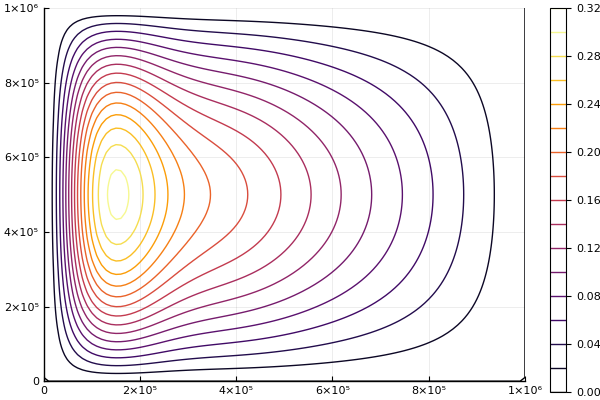

In [17]:
p2 = contour(xvals, yvals, η')
plot(p2)